# Projeto Ciência de Dados - Previsão de Vendas

- O desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa X investe: TV, Jornal e Rádio

### Passo a Passo

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos
- Passo 7: Interpretação de Resultados

In [3]:
import pandas as pd

dados = pd.read_csv('advertising.csv')

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


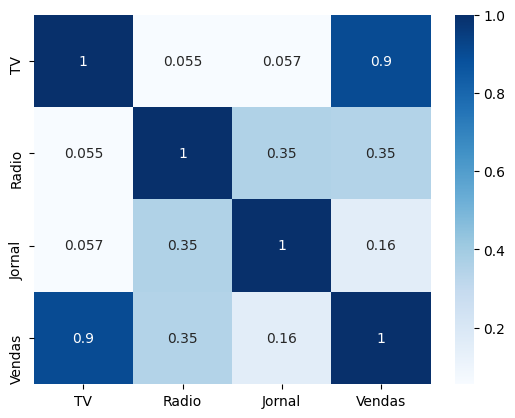

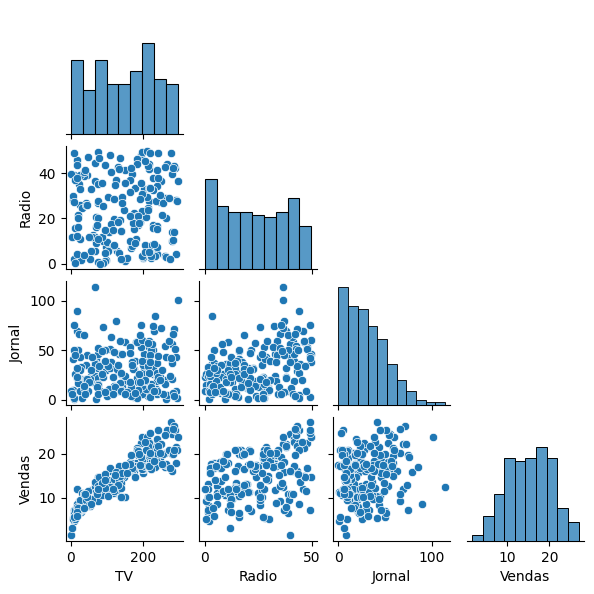

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

display(dados)
print(dados.info())

sns.heatmap(dados.corr(), annot = True, cmap = 'Blues')
plt.show()

sns.pairplot(dados, corner=True, height=1.5)
plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

y = dados['Vendas']
X = dados.drop(columns= ['Vendas'])

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(X_treino, y_treino)
modelo_arvoredecisao.fit(X_treino, y_treino)

RandomForestRegressor()

In [7]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(X_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(X_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao)) 

0.8900262213845798
0.955804975413977


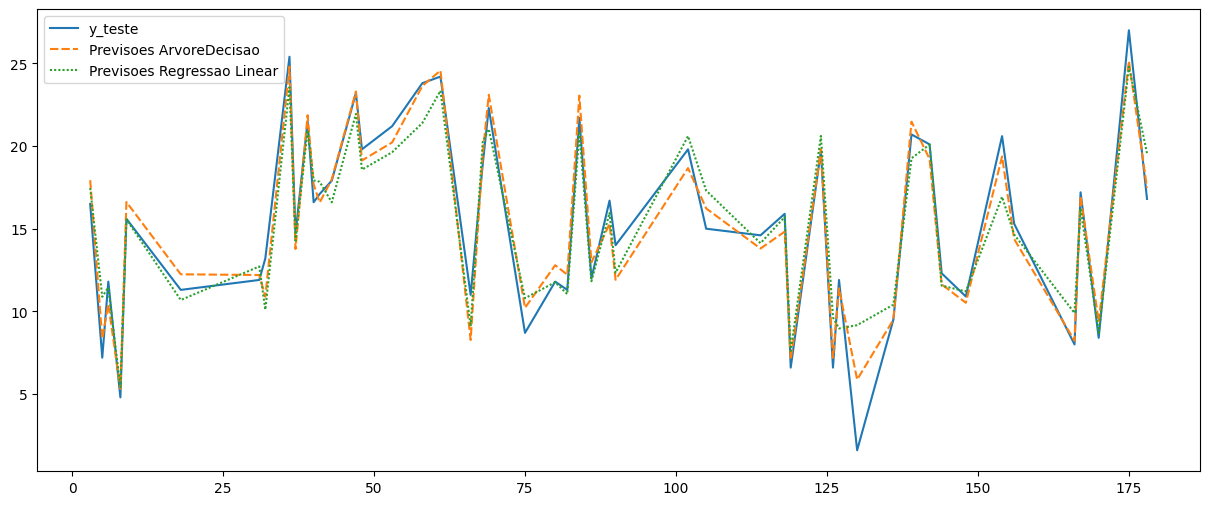

In [8]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

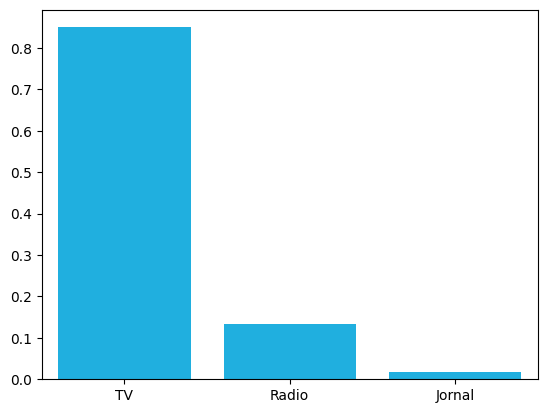

In [9]:
sns.barplot(x=X_treino.columns, y=modelo_arvoredecisao.feature_importances_, color="deepskyblue")
plt.show()

In [10]:
# Salvando tabelas auxiliares para fazer novos gráficos
tabela_auxiliar.to_excel('Tabela Auxiliar do Machine Learning.xlsx')

In [12]:
tabela_auxiliar2 = pd.DataFrame()
tabela_auxiliar2['Canal'] = X_treino.columns
tabela_auxiliar2['Nível de Importância'] = modelo_arvoredecisao.feature_importances_
tabela_auxiliar2.to_excel('Tabela Auxiliar de Importância.xlsx')